In [2]:
# imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sequencer

In [3]:
# get data from file
data = np.loadtxt("Filtered_Flux_Grid.txt", dtype=str)        

In [13]:
# convert str in data to float
for x in range(0,139):
    for y in range(0, len(data[x])):
        if data[x,y] == 'None':
            data[x,y] = 0
data = data.astype(float)

#offset to make sequancer work (to remove, -100 & /100)
offset_data = data *100+100
print(offset_data)

[[163.01230074 162.7706165  163.95050344 ... 109.56361643 109.51553218
  109.4505399 ]
 [183.4868951  185.15979879 185.84980999 ... 118.73977513 118.82275351
  118.86719002]
 [174.50467634 175.35837973 177.56715434 ... 112.59991457 112.60220503
  112.64457142]
 ...
 [174.47560804 174.4626795  172.44267415 ... 123.8891483  124.09952957
  124.26697957]
 [172.78148273 172.07610344 174.27317609 ... 124.18082295 124.40842757
  124.73101082]
 [100.         100.         100.         ... 100.         100.
  100.        ]]


In [8]:
for x in range(0,139):
    for y in range(0, len(data[x])):
        if data[x][y]<= 0:
            #xaxis = np.arange(1645)
            #fig, ax = plt.subplots(2,1)
            #ax[0].plot(xaxis, data[x])
            #ax[1].plot(xaxis, data[x])
            #plt.show()

SyntaxError: unexpected EOF while parsing (<ipython-input-8-545ca9b6b730>, line 8)

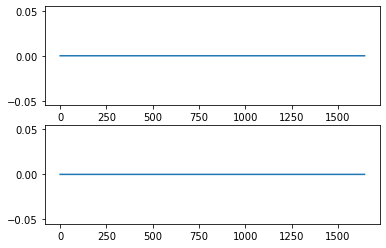

In [14]:
# plotting two graphs

xaxis = np.arange(1645)
fig, ax = plt.subplots(2,1)
ax[0].plot(xaxis, data[15])
ax[1].plot(xaxis, data[138])
plt.show()

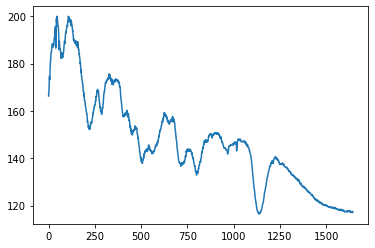

In [15]:
# plotting main test graph
xaxis = np.arange(1645)
plt.plot(xaxis, offset_data[20])
plt.show()

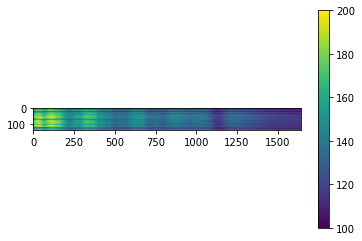

In [16]:
#plotting other different colorbar
plt.imshow(offset_data)
plt.clim(100, 200)
plt.colorbar()

Sequencer Code:

In [17]:
x = np.linspace(3854.0, 7142.0, num=1645)
print(x)

[3854. 3856. 3858. ... 7138. 7140. 7142.]


In [18]:
indices = np.arange(len(offset_data))
np.random.shuffle(indices)

objects_list_shuffled = offset_data[indices]
grid = np.copy(x)

In [19]:
# define the list of distance metrics to consider.
# I don't include the KL-Divergence because the dataset contains zero values
estimator_list = ['EMD', 'energy', 'L2']

# define the sequencer object with default parameters
seq = sequencer.Sequencer(grid, offset_data, estimator_list)

# to execute the sequencer, we first need to define the output directory to which the different 
# outputs will be saved
output_path = "sequencer_output"
final_elongation, final_sequence = seq.execute(output_path)

calculating the distance matrices for estimator: EMD, scale: 1
finished calculating this distance matrix list, it took: 3.549654006958008 seconds
calculating the distance matrices for estimator: EMD, scale: 2
finished calculating this distance matrix list, it took: 4.347697973251343 seconds
calculating the distance matrices for estimator: EMD, scale: 4
finished calculating this distance matrix list, it took: 5.8953351974487305 seconds
calculating the distance matrices for estimator: EMD, scale: 8
finished calculating this distance matrix list, it took: 7.759385108947754 seconds
calculating the distance matrices for estimator: EMD, scale: 16
finished calculating this distance matrix list, it took: 13.028929233551025 seconds
calculating the distance matrices for estimator: EMD, scale: 32
finished calculating this distance matrix list, it took: 22.536673069000244 seconds
calculating the distance matrices for estimator: EMD, scale: 64
finished calculating this distance matrix list, it took

/Users/Grace/opt/anaconda3/lib/python3.8/site-packages/sequencer/sequencer_.py:1025: RuntimeWarning: divide by zero encountered in true_divide
  distance_matrix = 1.0 / proximity_matrix_copy


In [20]:
# print all the metrics and scales, and examine the intermediate elongations
estimator_list, scale_list, elongation_list = seq.return_elongation_of_weighted_products_all_metrics_and_scales()

print("intermediate elongations for the different metrics and scales:")
for i in range(len(estimator_list)):
    print("metric=%s, scale=%s, elongation: %s" % (estimator_list[i], 
                                                   scale_list[i], 
                                                   np.round(elongation_list[i], 2)))

intermediate elongations for the different metrics and scales:
metric=EMD, scale=1, elongation: 27.32
metric=EMD, scale=2, elongation: 18.47
metric=EMD, scale=4, elongation: 9.47
metric=EMD, scale=8, elongation: 10.72
metric=EMD, scale=16, elongation: 9.47
metric=EMD, scale=32, elongation: 10.65
metric=EMD, scale=64, elongation: 4.47
metric=energy, scale=1, elongation: 26.16
metric=energy, scale=2, elongation: 12.73
metric=energy, scale=4, elongation: 11.42
metric=energy, scale=8, elongation: 11.33
metric=energy, scale=16, elongation: 9.76
metric=energy, scale=32, elongation: 10.71
metric=energy, scale=64, elongation: 6.48
metric=L2, scale=1, elongation: 11.02
metric=L2, scale=2, elongation: 11.04
metric=L2, scale=4, elongation: 8.46
metric=L2, scale=8, elongation: 9.35
metric=L2, scale=16, elongation: 6.29
metric=L2, scale=32, elongation: 6.08
metric=L2, scale=64, elongation: 3.47


In [21]:
print(final_sequence)

[ 34  35  84  65  85  52  45   2 130  14  63  96  22 126   9   3  97  54
  47   5  60 106 107 103 121  58   7  71   0  46  70  38  27  88  66  37
  87  94  95  16  99 118  98 120 114 117 127  13  48   4  67  69   6  21
 132  61  55  62 110 135  39 128 109  40 101  26 122   8  76  10 119  93
  20  64  68  19  80  78  51  83  36  32 102 115 116  79 136 137  33 108
  81 100  53 104 134  12  28  72  73 133  18  74  43  75  44  50 131  29
  41  31 125 129  30  25  24  17  15 138  77 105 123 124  11  42 113  49
 111  91 112  23  86  92  59  82  90   1  89  57  56]


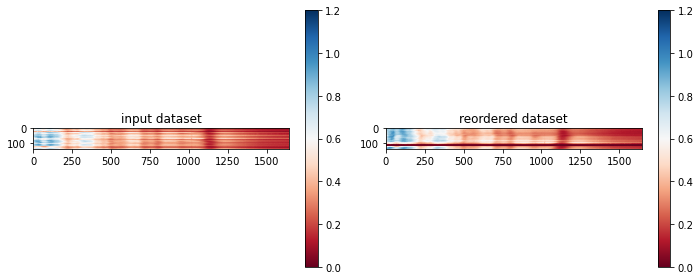

In [22]:
reordered_data = data[final_sequence, :]

plt.figure(1, figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("input dataset")
plt.imshow(data,cmap="RdBu")
plt.clim(0, 1.2)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("reordered dataset")
plt.imshow(reordered_data, cmap="RdBu")
plt.clim(0, 1.2)
plt.colorbar()

plt.tight_layout()